<a href="https://colab.research.google.com/github/linaamaris/Actividad-1/blob/main/Cultivo_rendimiento_v2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Configuración inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# Cargar los datos
data = pd.read_csv('AgriculturayDesarrolloRuralBolivar20241007.csv')


In [38]:
# Verificar los nombres reales de las columnas
print("Columnas del dataset:", data.columns.tolist())

Columnas del dataset: ['CodDpto', 'Departamento', 'CodMunicipio', 'Municipio', 'Cultivo', 'Periodo', 'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)', 'Rendimiento\n(t/ha)']


In [39]:
# Limpieza de nombres de columnas (eliminar saltos de línea)
data.columns = data.columns.str.replace('\n', ' ')

# Renombrar columnas para facilitar el acceso
data = data.rename(columns={
    'Área Sembrada (ha)': 'area_sembrada',
    'Área Cosechada (ha)': 'area_cosechada',
    'Producción (t)': 'produccion',
    'Rendimiento (t/ha)': 'rendimiento'
})
# Mostrar información básica del dataset
print("\nInformación del dataset:")
print(data.info())
print("\nPrimeras filas del dataset:")
print(data.head())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CodDpto         2635 non-null   int64  
 1   Departamento    2635 non-null   object 
 2   CodMunicipio    2635 non-null   int64  
 3   Municipio       2635 non-null   object 
 4   Cultivo         2635 non-null   object 
 5   Periodo         2635 non-null   int64  
 6   area_sembrada   2635 non-null   float64
 7   area_cosechada  2626 non-null   float64
 8   produccion      2626 non-null   float64
 9   rendimiento     2628 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 206.0+ KB
None

Primeras filas del dataset:
   CodDpto Departamento  CodMunicipio Municipio      Cultivo  Periodo  \
0       13      Bolívar         13006      Achí     Aguacate     2016   
1       13      Bolívar         13006      Achí      AHUYAMA     2016   
2       13

In [40]:
# Limpieza de datos
# Eliminar filas con valores nulos en columnas clave
data = data.dropna(subset=['area_sembrada', 'area_cosechada', 'produccion', 'rendimiento'])

# Verificar duplicados
print("\nNúmero de filas duplicadas:", data.duplicated().sum())
data = data.drop_duplicates()

# Convertir columnas a tipos adecuados
data['Periodo'] = data['Periodo'].astype(int)

# Continuar con el análisis como antes, usando los nuevos nombres de columnas:
# Area_Sembrada_ha, Area_Cosechada_ha, Produccion_t, Rendimiento_t_ha


Número de filas duplicadas: 43


In [41]:
# Mostrar información básica del dataset
print("Información del dataset:")
print(data.info())
print("\nPrimeras filas del dataset:")
print(data.head())
print("\nEstadísticas descriptivas:")
print(data.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2579 entries, 0 to 2634
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CodDpto         2579 non-null   int64  
 1   Departamento    2579 non-null   object 
 2   CodMunicipio    2579 non-null   int64  
 3   Municipio       2579 non-null   object 
 4   Cultivo         2579 non-null   object 
 5   Periodo         2579 non-null   int64  
 6   area_sembrada   2579 non-null   float64
 7   area_cosechada  2579 non-null   float64
 8   produccion      2579 non-null   float64
 9   rendimiento     2579 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 221.6+ KB
None

Primeras filas del dataset:
   CodDpto Departamento  CodMunicipio Municipio      Cultivo  Periodo  \
0       13      Bolívar         13006      Achí     Aguacate     2016   
1       13      Bolívar         13006      Achí      AHUYAMA     2016   
2       13      

In [42]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())



Valores nulos por columna:
CodDpto           0
Departamento      0
CodMunicipio      0
Municipio         0
Cultivo           0
Periodo           0
area_sembrada     0
area_cosechada    0
produccion        0
rendimiento       0
dtype: int64


In [43]:
# Limpiar los nombres de columnas (eliminar saltos de línea y espacios extra)
data.columns = data.columns.str.replace('\n', ' ').str.strip()

# Opcional: Renombrar columnas para facilitar el acceso
data = data.rename(columns={
    'Área Sembrada (ha)': 'area_sembrada',
    'Área Cosechada (ha)': 'area_cosechada',
    'Producción (t)': 'produccion',
    'Rendimiento (t/ha)': 'rendimiento'
})

# Verificar los nuevos nombres
print("\nNombres de columnas después de limpieza:")
print(data.columns.tolist())




Nombres de columnas después de limpieza:
['CodDpto', 'Departamento', 'CodMunicipio', 'Municipio', 'Cultivo', 'Periodo', 'area_sembrada', 'area_cosechada', 'produccion', 'rendimiento']


In [44]:
#Transformacion Ortografia Municipios.
#ortografia
# Diccionario de corrección para municipios
# Primero convertir todo a mayúsculas
data['Municipio'] = data['Municipio'].str.upper()

# Diccionario de correcciones para municipios (basado en nombres comunes en Bolívar)
correcciones_municipios = {
    'CORDOBA':'CÓRDOBA','EL CARMEN DE BOLIVAR':'EL CARMEN DE BOLÍVAR','EL PEÑON':'EL PEÑÓN','MAGANGUE':'MAGANGUÉ','MARIA LA BAJA':'MARÍA LA BAJA',
            'MOMPOS':'MOMPÓS','RIOVIEJO':'RIO VIEJO','SAN CRISTOBAL':'SAN CRISTÓBAL','TIQUISIO (PUERTO RICO)':'TIQUISIO','TIQUISIO (PUERTO RICO)':'TIQUISIO',
            'TIQUISIO (PUERTO RICO':'TIQUISIO'
    # Agrega más municipios según sea necesario
}

# Aplicar las correcciones
data['Municipio'] = data['Municipio'].replace(correcciones_municipios)

# Verificar resultados
print("Municipios únicos después de corrección:")
print(data['Municipio'].unique())

Municipios únicos después de corrección:
['ACHÍ' 'ALTOS DEL ROSARIO' 'ARENAL' 'ARJONA' 'BARRANCO DE LOBA' 'CALAMAR'
 'CARTAGENA DE INDIAS' 'CICUCO' 'CLEMENCIA' 'CÓRDOBA'
 'EL CARMEN DE BOLÍVAR' 'EL GUAMO' 'EL PEÑÓN' 'HATILLO DE LOBA' 'MAGANGUÉ'
 'MAHATES' 'MARGARITA' 'MARÍA LA BAJA' 'MONTECRISTO' 'NOROSI' 'PINILLOS'
 'REGIDOR' 'RIO VIEJO' 'SAN CRISTÓBAL' 'SAN ESTANISLAO' 'SAN FERNANDO'
 'SAN JACINTO' 'SAN JACINTO DEL CAUCA' 'SAN JUAN NEPOMUCENO'
 'SAN MARTIN DE LOBA' 'SAN PABLO' 'SANTA CATALINA' 'SANTA ROSA'
 'SANTA ROSA DEL SUR' 'SIMITÍ' 'SOPLAVIENTO' 'TALAIGUA NUEVO' 'TIQUISIO'
 'TURBACO' 'TURBANA' 'VILLANUEVA' 'ZAMBRANO' 'ARROYOHONDO' 'CANTAGALLO'
 'MOMPÓS' 'MORALES']


In [45]:
# Diccionario de corrección ortográfica para cultivos
reemplazar_cultivos = {
    'AJI': 'AJÍ DULCE',
    'AJÍ': 'AJÍ DULCE',
    'AJI DULCE': 'AJÍ DULCE',
    'AJI TABASCO': 'AJÍ TABASCO',
    'AJONJOLI': 'AJONJOLÍ',
    'ALGODON': 'ALGODÓN',
    'CAFE': 'CAFÉ',
    'CITRICOS': 'CÍTRICOS',
    'FRIJOL': 'FRÍJOL',
    'GUANABANA': 'GUANÁBANA',
    'LIMON': 'LIMÓN',
    'MAIZ TRADICIONAL': 'MAÍZ TRADICIONAL',
    'MAIZ TECNIFICADO': 'MAÍZ TECNIFICADO',
    'PLATANO': 'PLÁTANO',
    'NISPERO': 'NÍSPERO',
    'MELON': 'MELÓN',
    'PIMENTON': 'PIMENTÓN'
}

# Convertir a mayúsculas y aplicar corrección
data['Cultivo'] = data['Cultivo'].str.upper().replace(reemplazar_cultivos)

# Verificar valores únicos corregidos
print("Cultivos únicos después de corrección:")
print(data['Cultivo'].unique())


Cultivos únicos después de corrección:
['AGUACATE' 'AHUYAMA' 'ARROZ RIEGO' 'ARROZ SECANO MANUAL'
 'ARROZ SECANO MECANIZADO' 'CACAO' 'CAÑA PANELERA' 'MAÍZ TRADICIONAL'
 'PATILLA' 'PLÁTANO' 'YUCA' 'ZAPOTE' 'PIÑA' 'MANGO' 'AJÍ DULCE' 'GUAYABA'
 'ÑAME DIAMANTE' 'BERENJENA' 'CILANTRO' 'CIRUELA' 'COCO' 'FRÍJOL'
 'GUANÁBANA' 'MELÓN' 'MILLO' 'PEPINO COHOMBRO' 'PIMENTÓN' 'TOMATE' 'LIMÓN'
 'ÑAME ESPINO' 'AJONJOLÍ' 'ÑAME' 'TABACO NEGRO' 'AJÍ TABASCO'
 'TABACO RUBIO' 'NARANJA' 'PALMA DE ACEITE' 'CÍTRICOS' 'JATROPHA CURCAS'
 'MAÍZ TECNIFICADO' 'YUCA INDUSTRIAL' 'MAÍZ FORRAJERO' 'CAUCHO' 'CAFÉ'
 'PITAHAYA' 'HORTALIZAS VARIAS' 'NÍSPERO' 'PEPINO' 'NARANJA VALENCIA'
 'ALGODÓN' 'JATROPHA' 'FRIJOL ARBUSTIVO' 'EUCALIPTO BABY BLUE'
 'NARANJA JAFFA' 'PAPAYA' 'POMELO' 'CAÑA AZUCARERA' 'FLORES Y FOLLAJES'
 'ARROZ' 'MAÍZ' 'SORGO' 'TABACO' 'SACHA INCHI' 'BATATA' 'ACHIOTE']


# **Información por Area Sembrada**

<Figure size 1400x800 with 0 Axes>

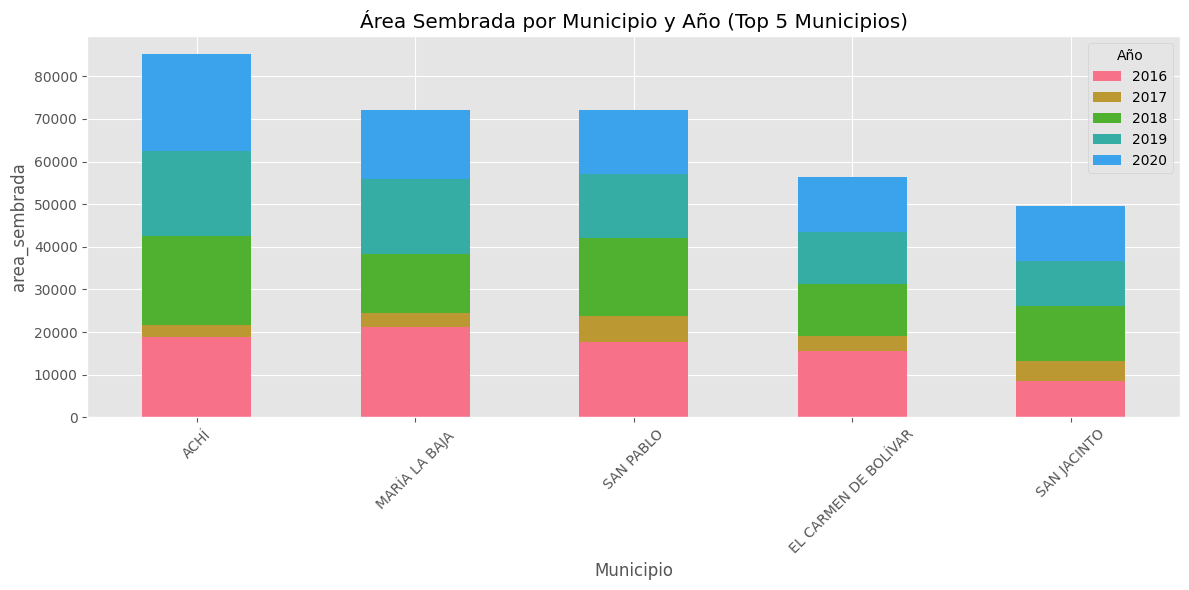

In [46]:
# Agrupar por municipio y año
area_sembrada = data.groupby(['Municipio', 'Periodo'])['area_sembrada'].sum().unstack()

# Graficar los 5 municipios con mayor área sembrada en el último año
last_year = data['Periodo'].max()
# Versión corregida (sin el paréntesis extra)
top_municipios = data[data['Periodo'] == last_year].groupby('Municipio')['area_sembrada'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
area_sembrada.loc[top_municipios].plot(kind='bar', stacked=True)
plt.title('Área Sembrada por Municipio y Año (Top 5 Municipios)')
plt.ylabel('area_sembrada')
plt.xlabel('Municipio')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

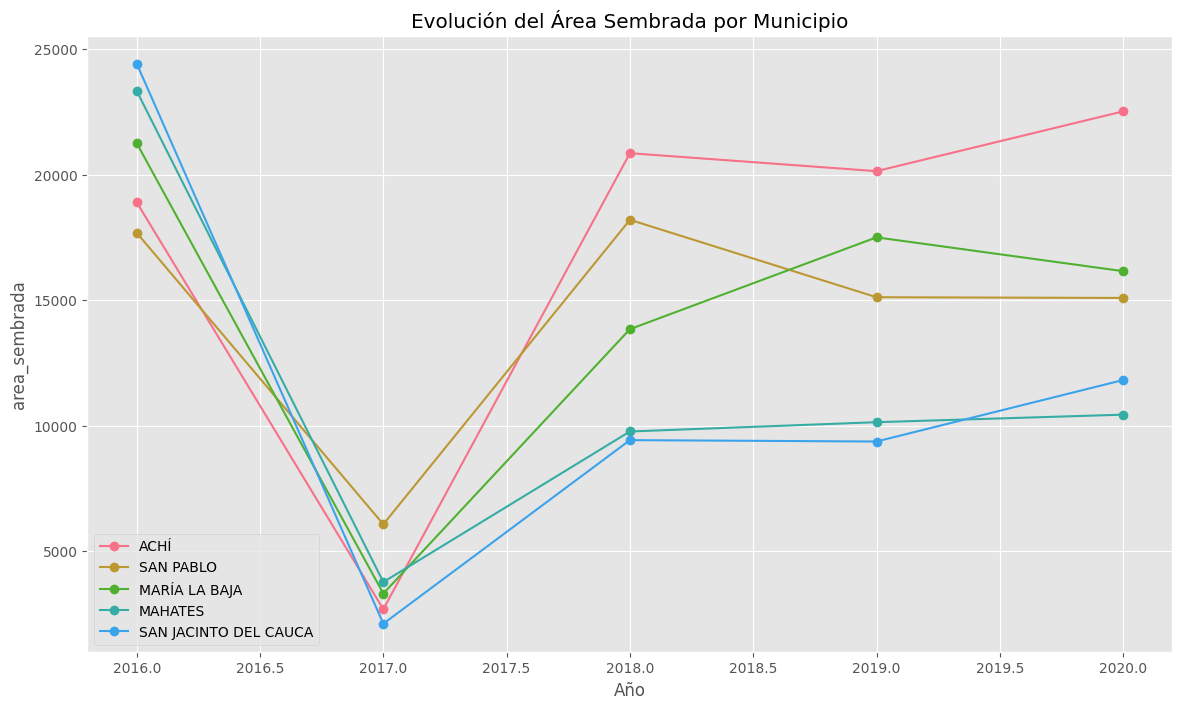

In [47]:
# Seleccionar algunos municipios representativos
sample_municipios = data.groupby('Municipio')['area_sembrada'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
for municipio in sample_municipios:
    municipio_data = data[data['Municipio'] == municipio]
    yearly_area = municipio_data.groupby('Periodo')['area_sembrada'].sum()
    plt.plot(yearly_area.index, yearly_area.values, marker='o', label=municipio)

plt.title('Evolución del Área Sembrada por Municipio')
plt.ylabel('area_sembrada')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()

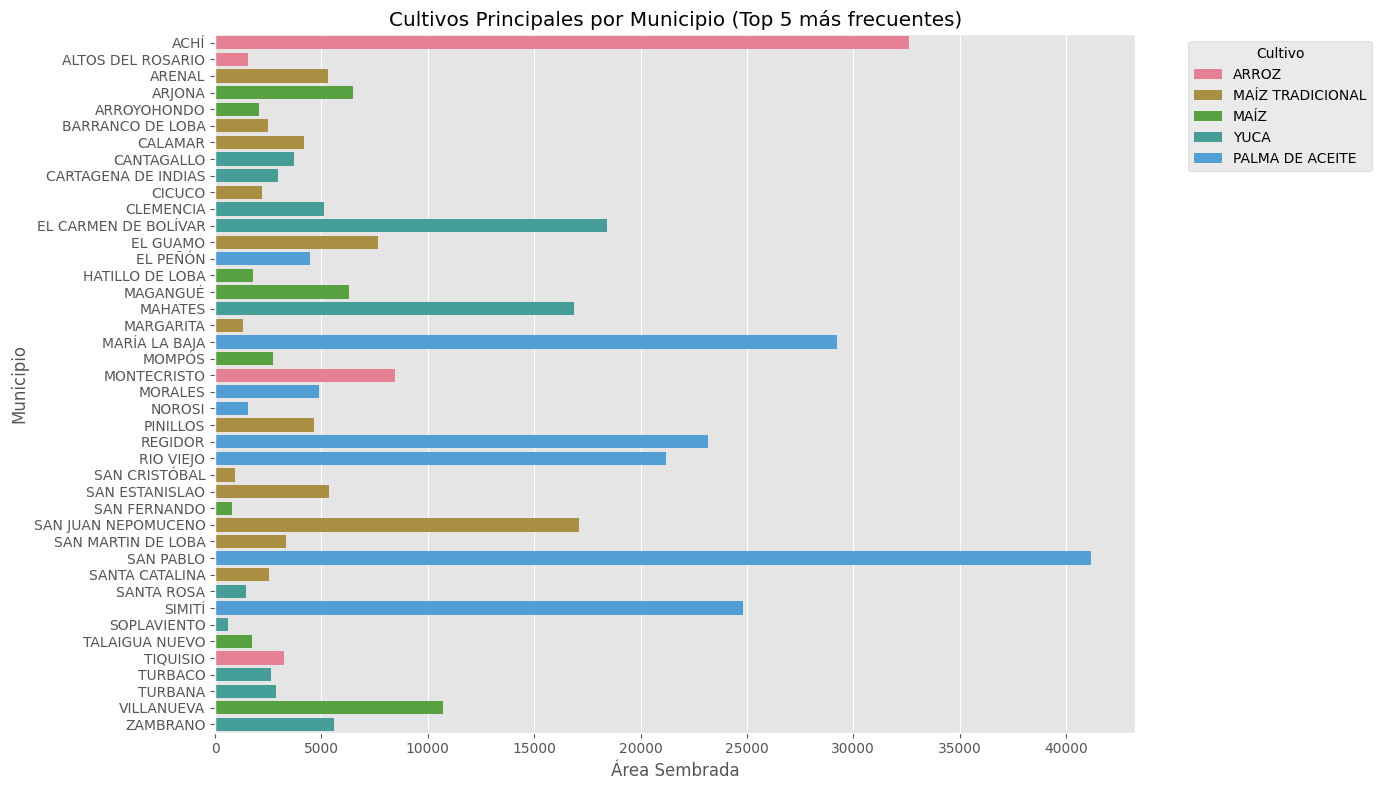

In [48]:
# Agrupar área sembrada por Municipio y Cultivo
top_cultivos = data.groupby(['Municipio', 'Cultivo'])['area_sembrada'].sum().reset_index()

# Tomar el cultivo con mayor área sembrada por municipio
top_por_municipio = top_cultivos.loc[top_cultivos.groupby('Municipio')['area_sembrada'].idxmax()]

# Identificar los 5 cultivos más frecuentes entre los cultivos principales por municipio
top_5_cultivos = top_por_municipio['Cultivo'].value_counts().nlargest(5).index

# Filtrar datos para esos 5 cultivos
top_por_municipio = top_por_municipio[top_por_municipio['Cultivo'].isin(top_5_cultivos)]

# Gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=top_por_municipio,
            x='area_sembrada', y='Municipio', hue='Cultivo', dodge=False)

plt.title('Cultivos Principales por Municipio (Top 5 más frecuentes)')
plt.xlabel('Área Sembrada')
plt.ylabel('Municipio')
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



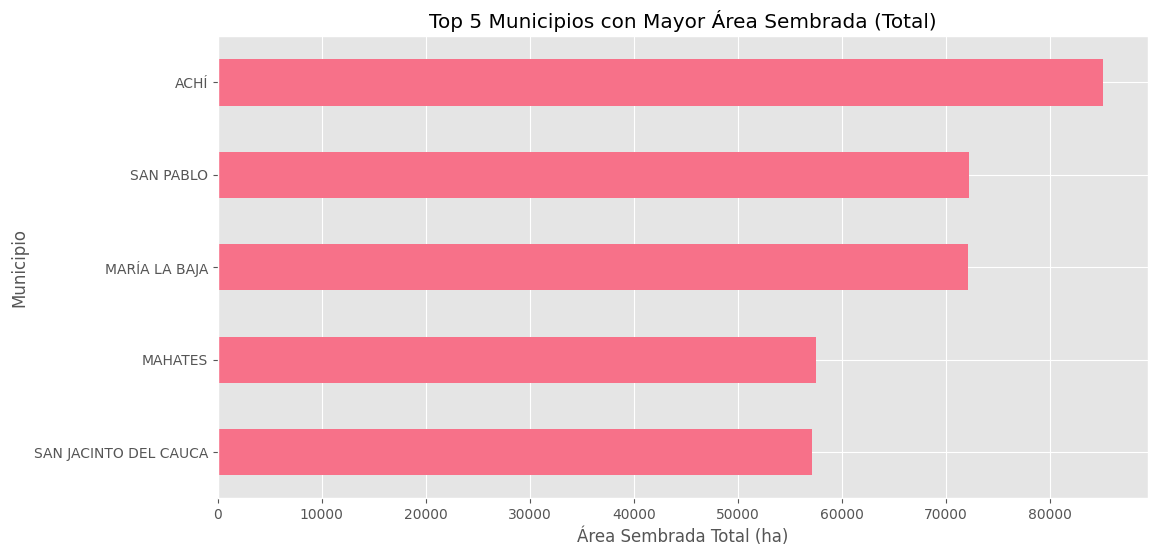

In [49]:
# Municipios con mayor área sembrada en total
total_area = data.groupby('Municipio')['area_sembrada'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
total_area.plot(kind='barh')
plt.title('Top 5 Municipios con Mayor Área Sembrada (Total)')
plt.xlabel('Área Sembrada Total (ha)')
plt.ylabel('Municipio')
plt.gca().invert_yaxis()
plt.show()

# **Información por Area Cosechada**

<Figure size 1400x800 with 0 Axes>

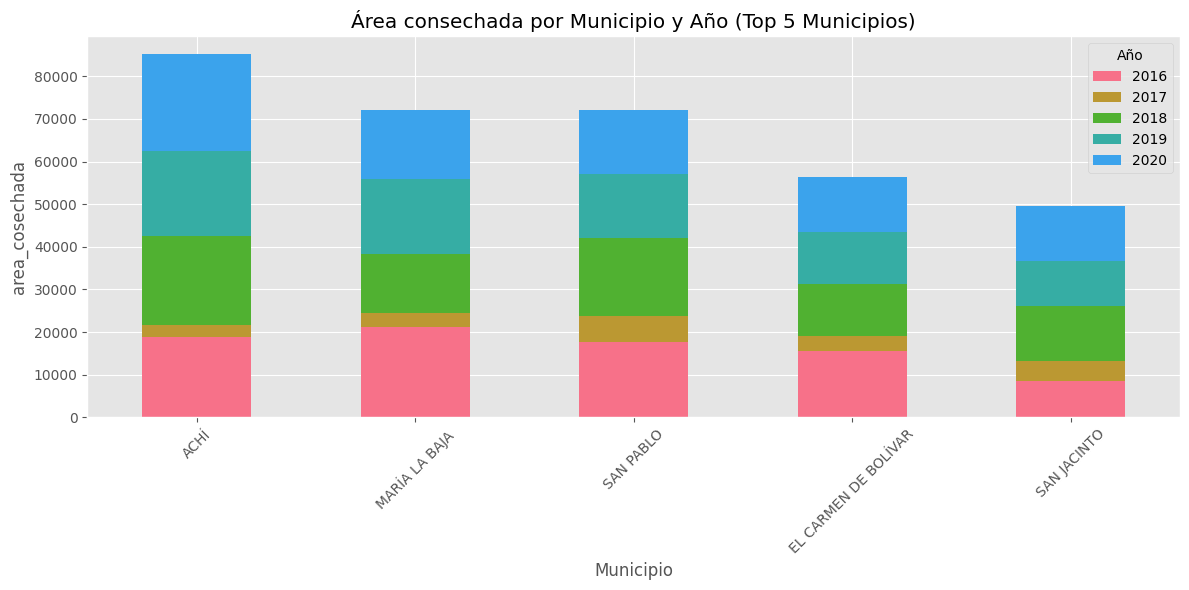

In [50]:
# Agrupar por municipio y año
area_consechada = data.groupby(['Municipio', 'Periodo'])['area_cosechada'].sum().unstack()

# Graficar los 5 municipios con mayor área sembrada en el último año
last_year = data['Periodo'].max()
# Versión corregida (sin el paréntesis extra)
top_municipios = data[data['Periodo'] == last_year].groupby('Municipio')['area_cosechada'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
area_sembrada.loc[top_municipios].plot(kind='bar', stacked=True)
plt.title('Área consechada por Municipio y Año (Top 5 Municipios)')
plt.ylabel('area_cosechada')
plt.xlabel('Municipio')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

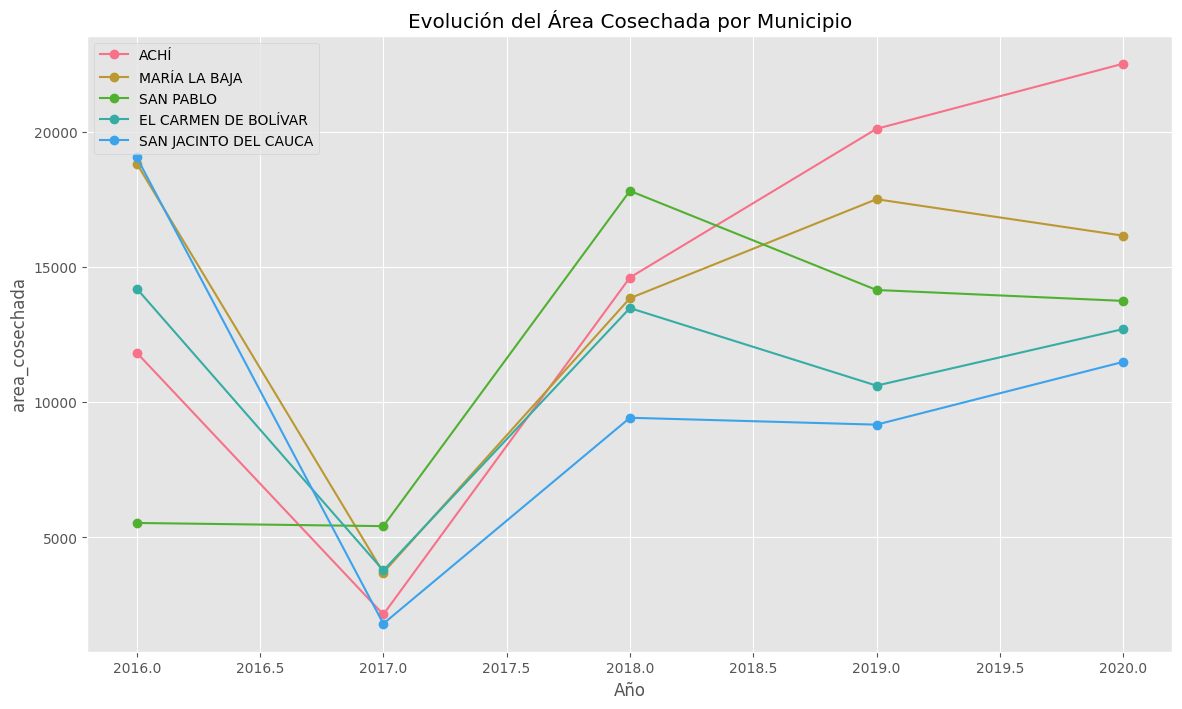

In [51]:
# Seleccionar algunos municipios representativos
sample_municipios = data.groupby('Municipio')['area_cosechada'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
for municipio in sample_municipios:
    municipio_data = data[data['Municipio'] == municipio]
    yearly_area = municipio_data.groupby('Periodo')['area_cosechada'].sum()
    plt.plot(yearly_area.index, yearly_area.values, marker='o', label=municipio)

plt.title('Evolución del Área Cosechada por Municipio')
plt.ylabel('area_cosechada')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()

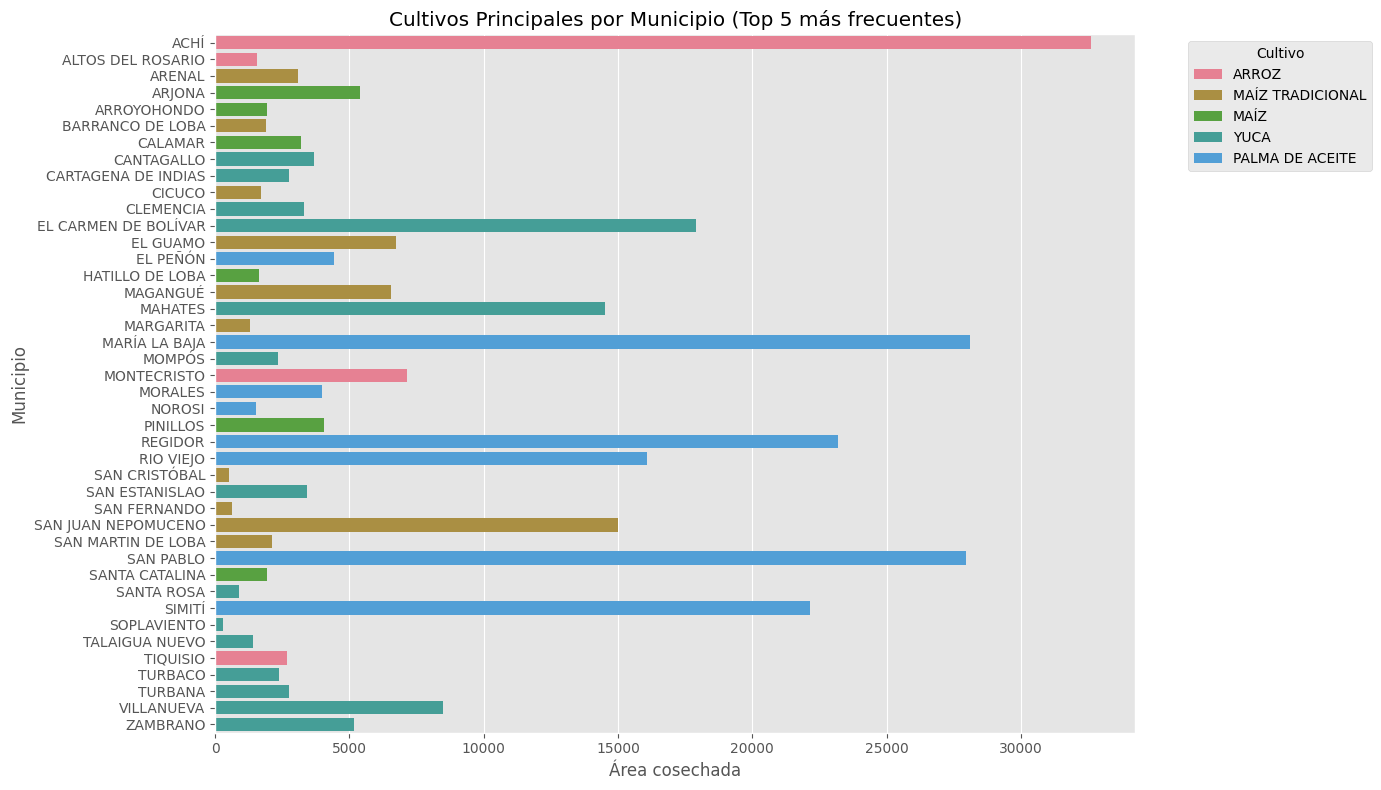

In [52]:
# Agrupar área cosechada por Municipio y Cultivo
top_cultivos = data.groupby(['Municipio', 'Cultivo'])['area_cosechada'].sum().reset_index()

# Tomar el cultivo con mayor área cosechada por municipio
top_por_municipio = top_cultivos.loc[top_cultivos.groupby('Municipio')['area_cosechada'].idxmax()]

# Identificar los 5 cultivos más frecuentes entre los cultivos principales por municipio
top_5_cultivos = top_por_municipio['Cultivo'].value_counts().nlargest(5).index

# Filtrar datos para esos 5 cultivos
top_por_municipio = top_por_municipio[top_por_municipio['Cultivo'].isin(top_5_cultivos)]

# Gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=top_por_municipio,
            x='area_cosechada', y='Municipio', hue='Cultivo', dodge=False)

plt.title('Cultivos Principales por Municipio (Top 5 más frecuentes)')
plt.xlabel('Área cosechada')
plt.ylabel('Municipio')
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


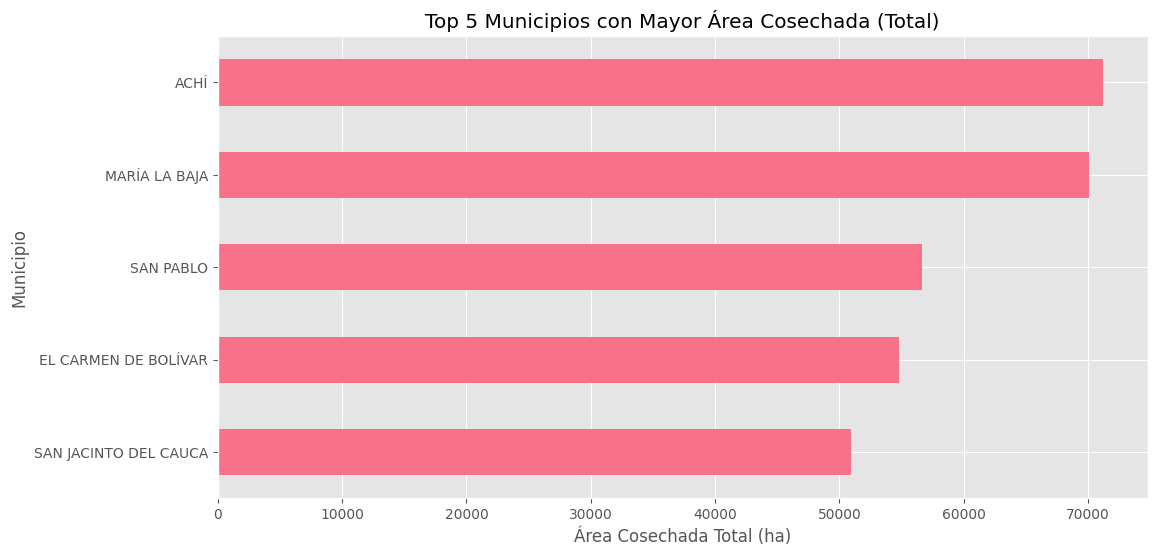

In [53]:
# Municipios con mayor área cosechada en total
total_area = data.groupby('Municipio')['area_cosechada'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
total_area.plot(kind='barh')
plt.title('Top 5 Municipios con Mayor Área Cosechada (Total)')
plt.xlabel('Área Cosechada Total (ha)')
plt.ylabel('Municipio')
plt.gca().invert_yaxis()
plt.show()

# **Informaciòn de Producciòn**

<Figure size 1400x800 with 0 Axes>

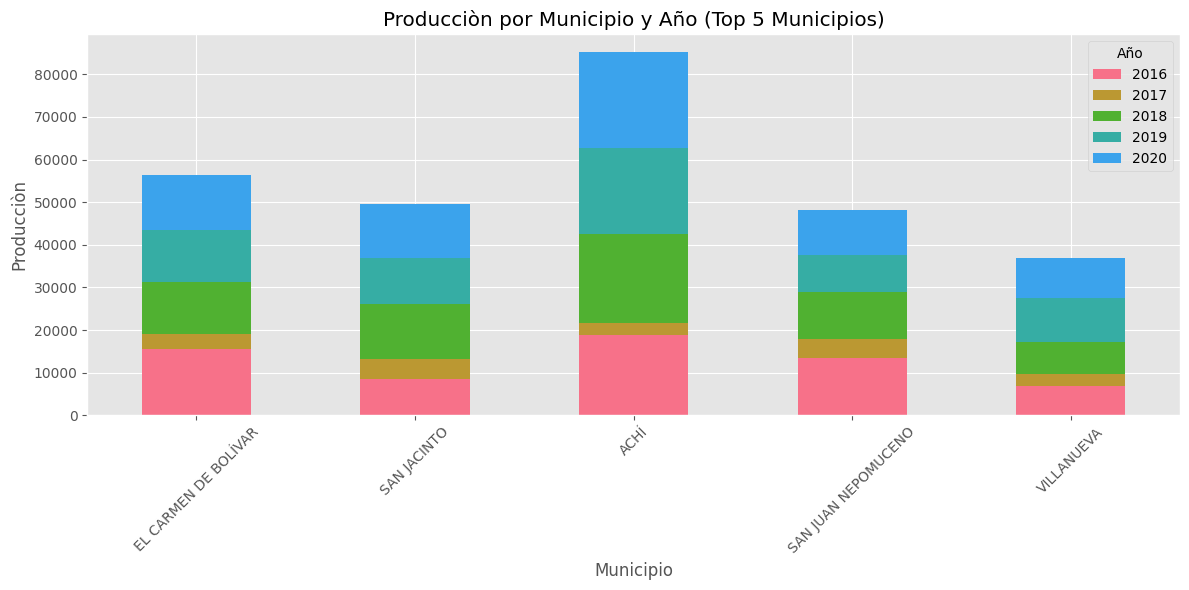

In [54]:
# Agrupar por municipio y año
produccion = data.groupby(['Municipio', 'Periodo'])['produccion'].sum().unstack()

# Graficar los 5 municipios con mayor producciòn en el último año
last_year = data['Periodo'].max()
# Versión corregida (sin el paréntesis extra)
top_municipios = data[data['Periodo'] == last_year].groupby('Municipio')['produccion'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
area_sembrada.loc[top_municipios].plot(kind='bar', stacked=True)
plt.title('Producciòn por Municipio y Año (Top 5 Municipios)')
plt.ylabel('Producciòn')
plt.xlabel('Municipio')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

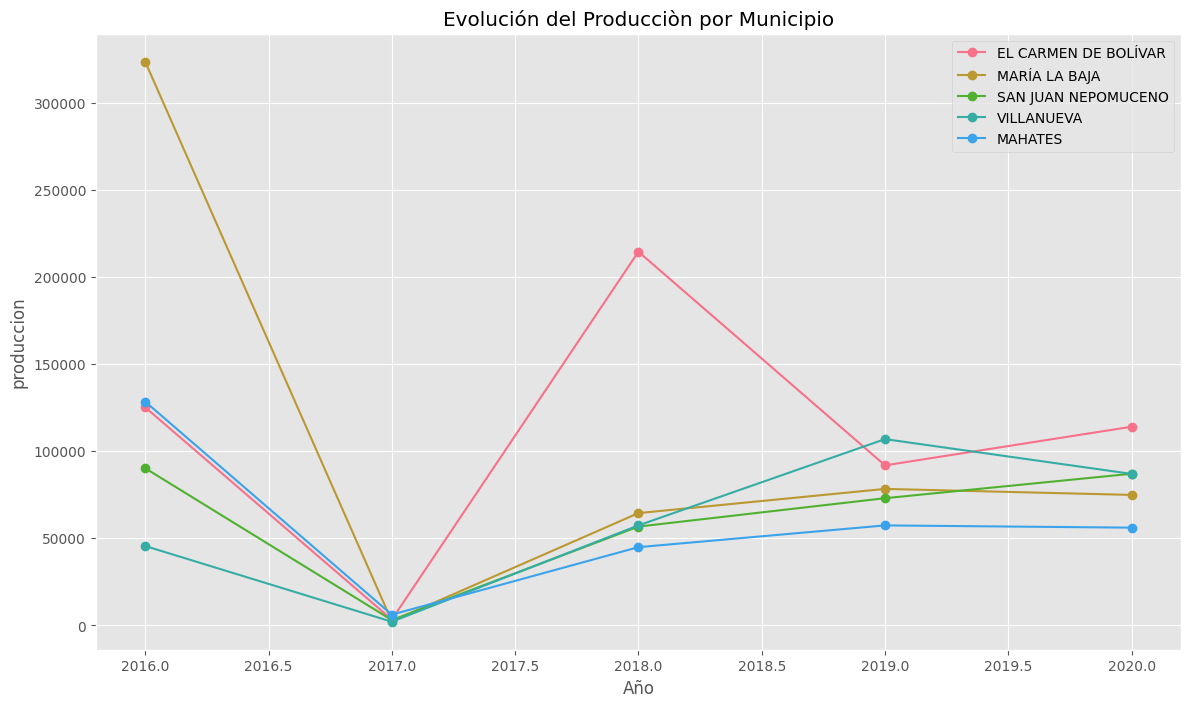

In [55]:
# Seleccionar algunos municipios representativos
sample_municipios = data.groupby('Municipio')['produccion'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
for municipio in sample_municipios:
    municipio_data = data[data['Municipio'] == municipio]
    yearly_area = municipio_data.groupby('Periodo')['produccion'].sum()
    plt.plot(yearly_area.index, yearly_area.values, marker='o', label=municipio)

plt.title('Evolución del Producciòn por Municipio')
plt.ylabel('produccion')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()

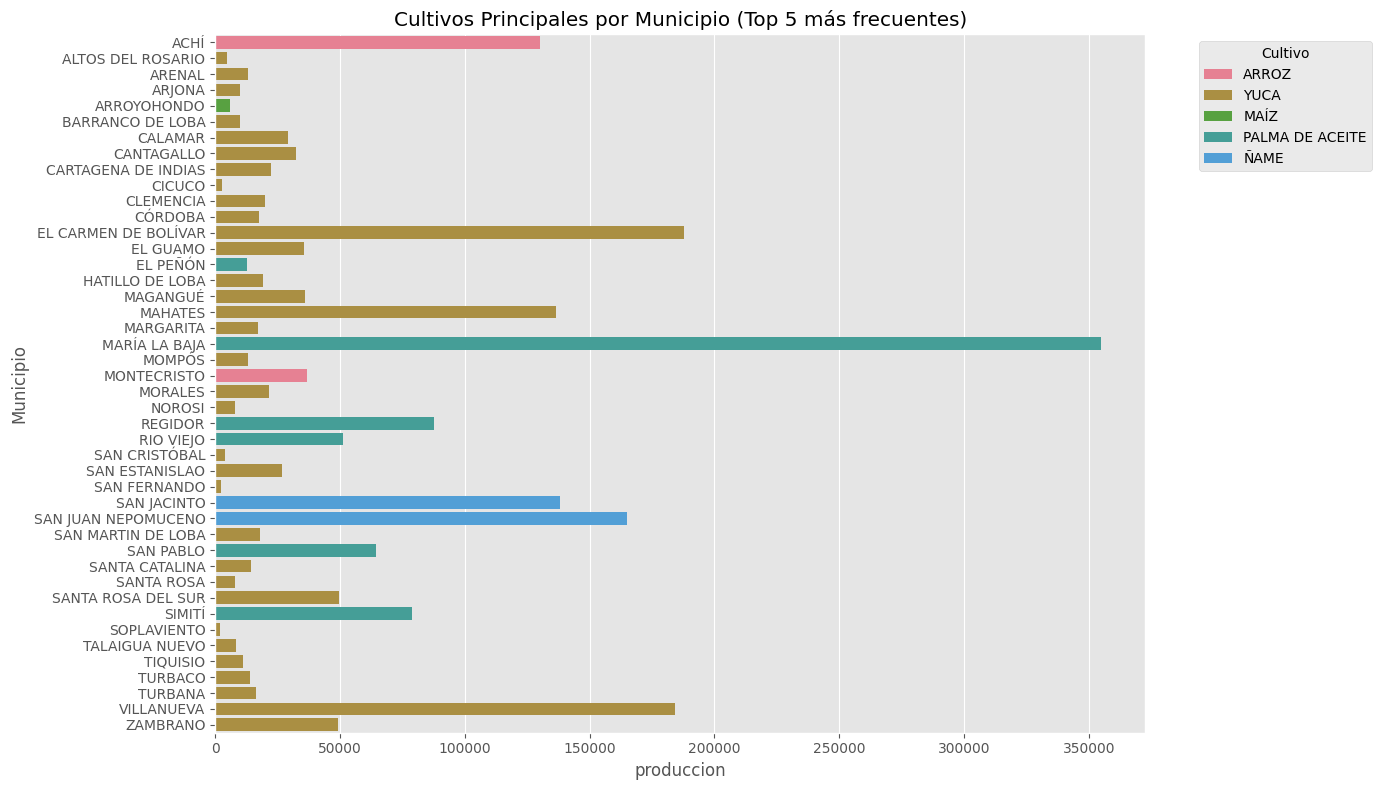

In [56]:
# Agrupar producciòn por Municipio y Cultivo
top_cultivos = data.groupby(['Municipio', 'Cultivo'])['produccion'].sum().reset_index()

# Tomar el cultivo con mayor producciòn por municipio
top_por_municipio = top_cultivos.loc[top_cultivos.groupby('Municipio')['produccion'].idxmax()]

# Identificar los 5 cultivos más frecuentes entre los cultivos principales por municipio
top_5_cultivos = top_por_municipio['Cultivo'].value_counts().nlargest(5).index

# Filtrar datos para esos 5 cultivos
top_por_municipio = top_por_municipio[top_por_municipio['Cultivo'].isin(top_5_cultivos)]

# Gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=top_por_municipio,
            x='produccion', y='Municipio', hue='Cultivo', dodge=False)

plt.title('Cultivos Principales por Municipio (Top 5 más frecuentes)')
plt.xlabel('produccion')
plt.ylabel('Municipio')
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

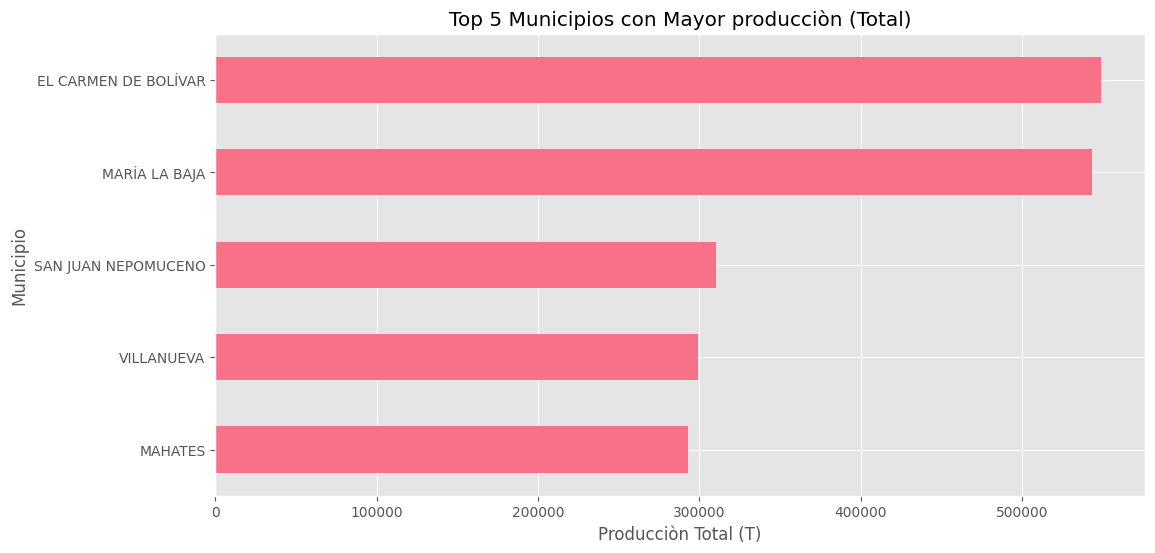

In [57]:
# Municipios con mayor producciòn en total
total_area = data.groupby('Municipio')['produccion'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
total_area.plot(kind='barh')
plt.title('Top 5 Municipios con Mayor producciòn (Total)')
plt.xlabel('Producciòn Total (T)')
plt.ylabel('Municipio')
plt.gca().invert_yaxis()
plt.show()

# **Informaciòn Rendimiento**

<Figure size 1400x800 with 0 Axes>

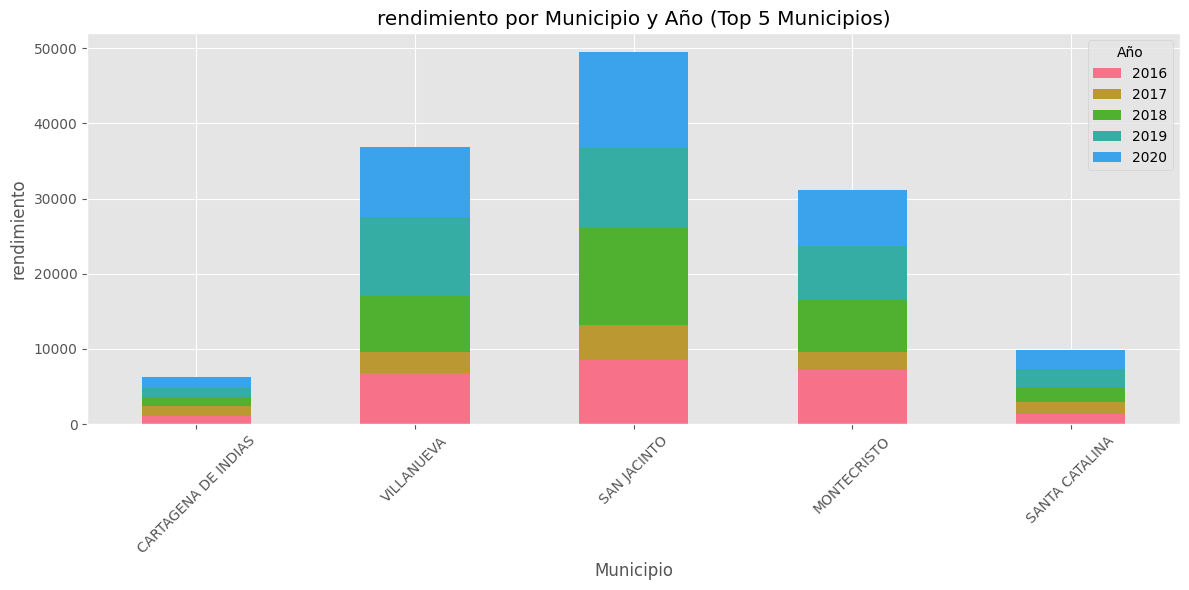

In [58]:
# Agrupar por municipio y año
area_consechada = data.groupby(['Municipio', 'Periodo'])['rendimiento'].sum().unstack()

# Graficar los 10 municipios con mayor área sembrada en el último año
last_year = data['Periodo'].max()
# Versión corregida (sin el paréntesis extra)
top_municipios = data[data['Periodo'] == last_year].groupby('Municipio')['rendimiento'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
area_sembrada.loc[top_municipios].plot(kind='bar', stacked=True)
plt.title('rendimiento por Municipio y Año (Top 5 Municipios)')
plt.ylabel('rendimiento')
plt.xlabel('Municipio')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

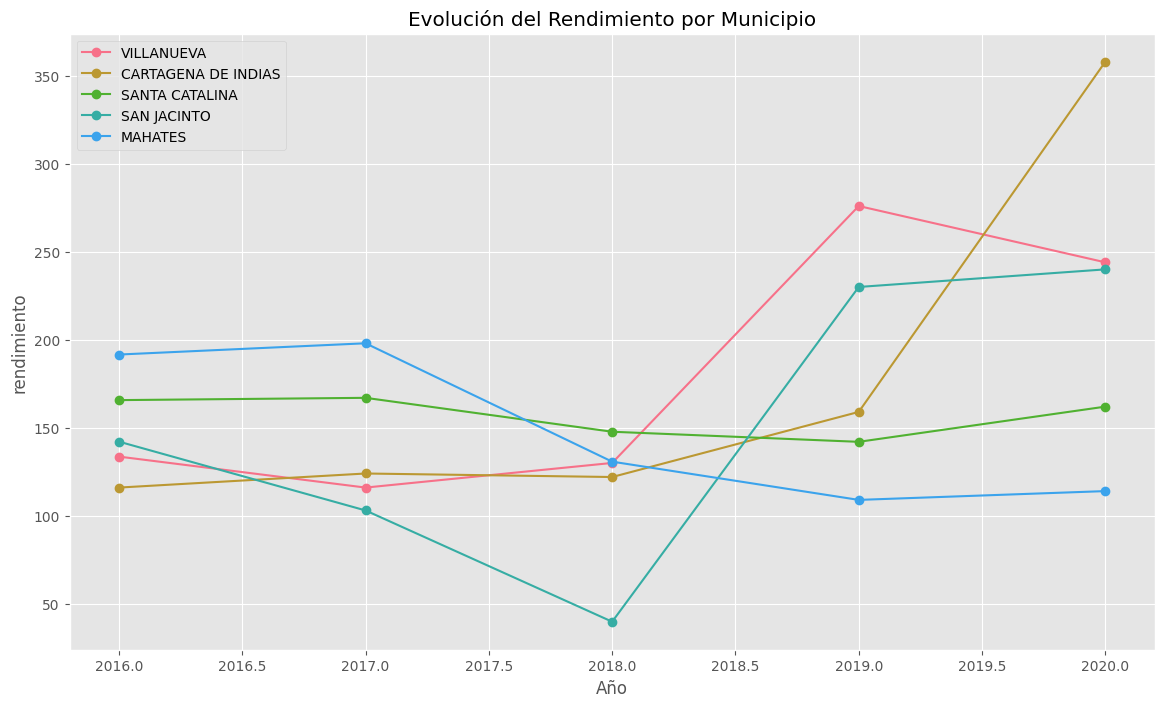

In [59]:
# Seleccionar algunos municipios representativos
sample_municipios = data.groupby('Municipio')['rendimiento'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
for municipio in sample_municipios:
    municipio_data = data[data['Municipio'] == municipio]
    yearly_area = municipio_data.groupby('Periodo')['rendimiento'].sum()
    plt.plot(yearly_area.index, yearly_area.values, marker='o', label=municipio)

plt.title('Evolución del Rendimiento por Municipio')
plt.ylabel('rendimiento')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()

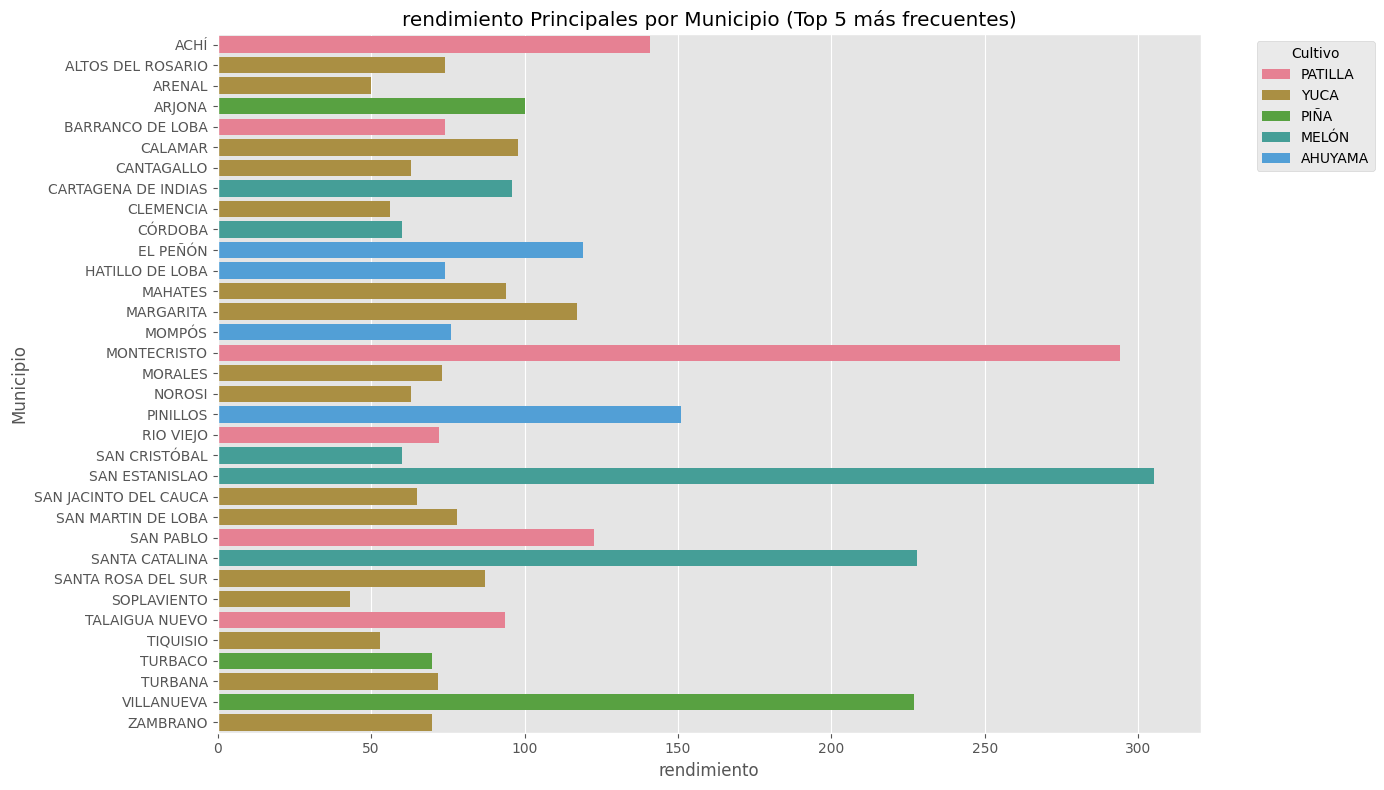

In [60]:
# Agrupar rendimiento por Municipio y Cultivo
top_cultivos = data.groupby(['Municipio', 'Cultivo'])['rendimiento'].sum().reset_index()

# Tomar el cultivo con mayor rendimiento por municipio
top_por_municipio = top_cultivos.loc[top_cultivos.groupby('Municipio')['rendimiento'].idxmax()]

# Identificar los 5 cultivos más frecuentes entre los cultivos principales por municipio
top_5_cultivos = top_por_municipio['Cultivo'].value_counts().nlargest(5).index

# Filtrar datos para esos 5 cultivos
top_por_municipio = top_por_municipio[top_por_municipio['Cultivo'].isin(top_5_cultivos)]

# Gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=top_por_municipio,
            x='rendimiento', y='Municipio', hue='Cultivo', dodge=False)

plt.title('rendimiento Principales por Municipio (Top 5 más frecuentes)')
plt.xlabel('rendimiento')
plt.ylabel('Municipio')
plt.legend(title='Cultivo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

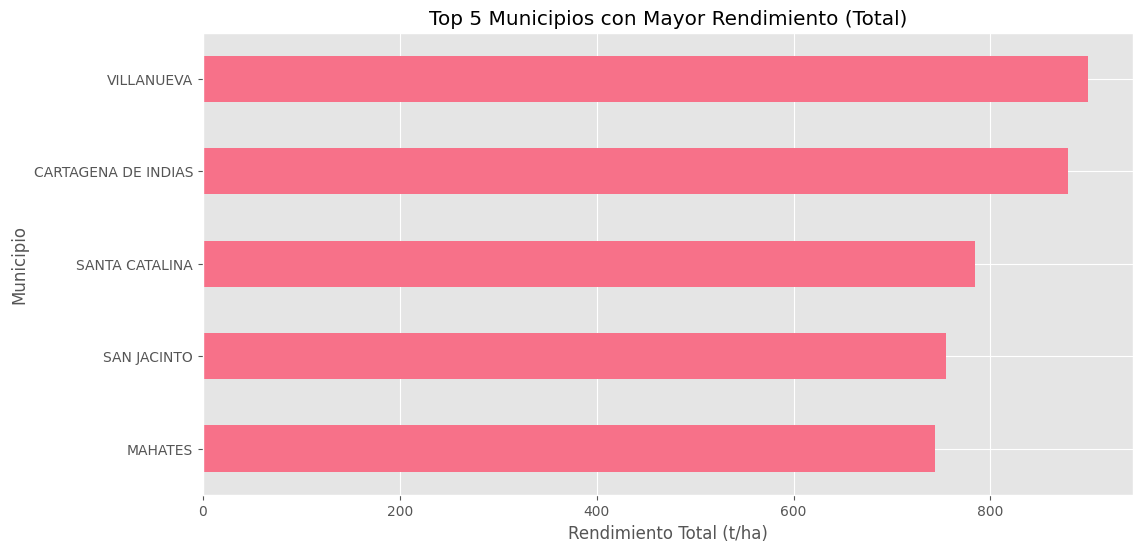

In [61]:
# Municipios con mayor producciòn en total
total_area = data.groupby('Municipio')['rendimiento'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
total_area.plot(kind='barh')
plt.title('Top 5 Municipios con Mayor Rendimiento (Total)')
plt.xlabel('Rendimiento Total (t/ha)')
plt.ylabel('Municipio')
plt.gca().invert_yaxis()
plt.show()

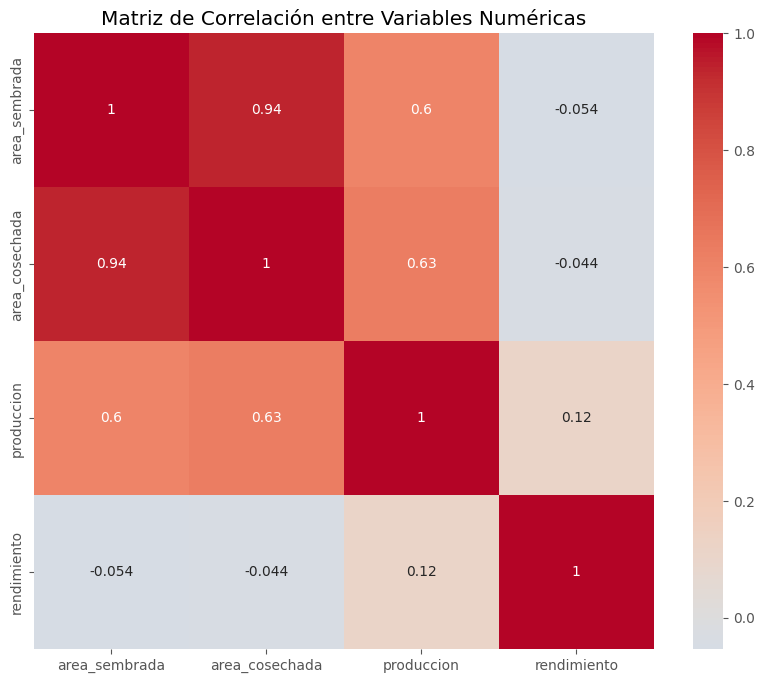

In [62]:
# Seleccionar solo variables numéricas
numeric_cols = ['area_sembrada', 'area_cosechada', 'produccion', 'rendimiento']
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

/tmp/ipython-input-63-1834946383.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


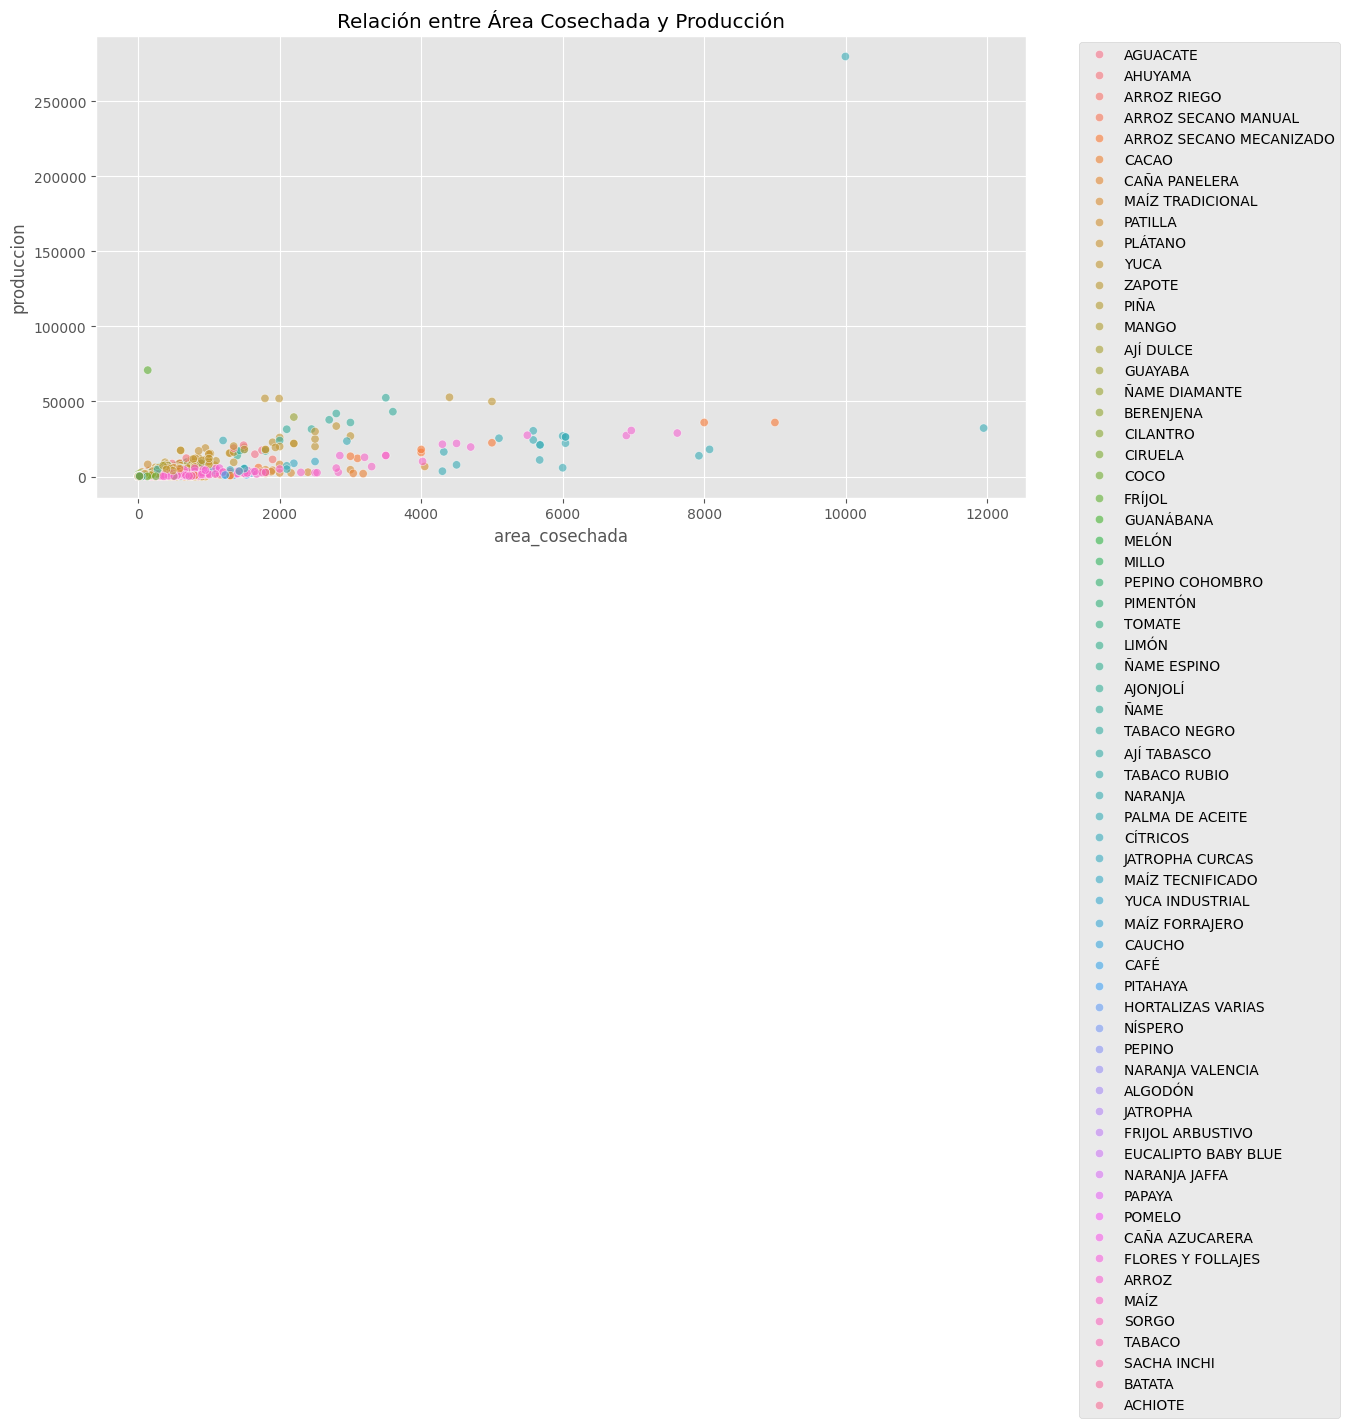

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='area_cosechada', y='produccion', hue='Cultivo', alpha=0.6)
plt.title('Relación entre Área Cosechada y Producción')
plt.xlabel('area_cosechada')
plt.ylabel('produccion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [64]:
# Seleccionar características y variable objetivo
X = data[['Municipio', 'Cultivo', 'area_sembrada', 'area_cosechada']]
y = data['rendimiento']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: One-Hot Encoding para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Municipio', 'Cultivo'])
    ],
    remainder='passthrough'
)

# Mostrar formas de los conjuntos de datos
print("\nFormas de los conjuntos de datos:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Formas de los conjuntos de datos:
X_train: (2063, 4), X_test: (516, 4)
y_train: (2063,), y_test: (516,)


In [65]:
#Modelado y evaluación
#Pipeline para Linear Regression
# Crear pipeline para Linear Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar modelo
lr_pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluar modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")


Linear Regression Performance:
MSE: 74.84
R²: 0.24


In [66]:
#Pipeline para Random Forest Regressor
# Crear pipeline para Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar modelo
rf_pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluar modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Random Forest Regressor Performance:
MSE: 80.16
R²: 0.19



Comparación de Modelos:
               Model        MSE        R²
0  Linear Regression  74.843071  0.243426
1      Random Forest  80.162498  0.189653


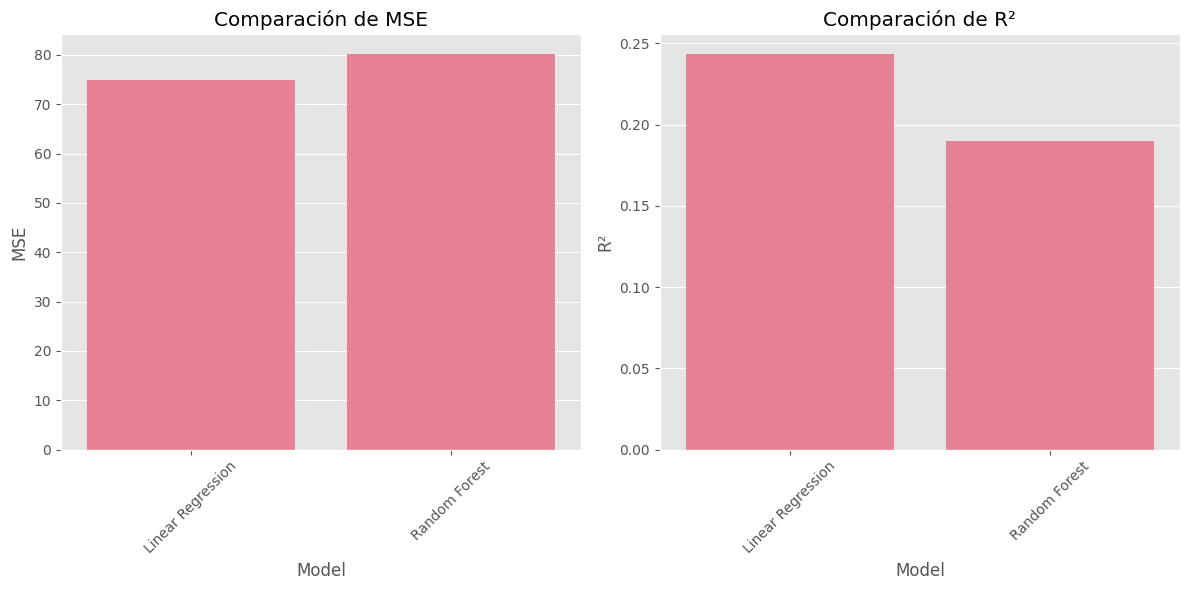

In [68]:
#Comparación de modelos
# Crear DataFrame para comparación
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R²': [r2_lr, r2_rf]
})

# Mostrar resultados
print("\nComparación de Modelos:")
print(results)

# Visualizar comparación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=results, x='Model', y='MSE')
plt.title('Comparación de MSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=results, x='Model', y='R²')
plt.title('Comparación de R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

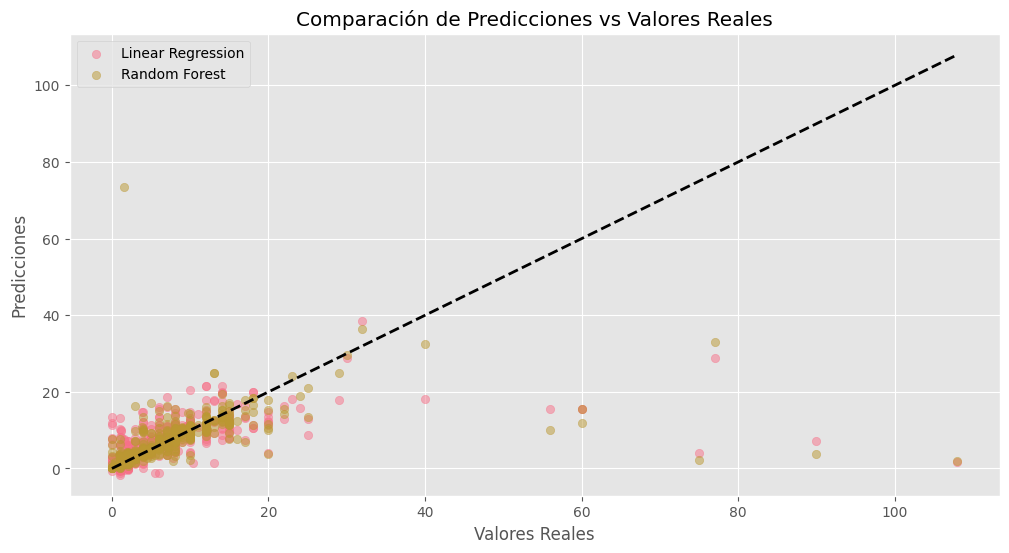

In [69]:
#Visualización de predicciones vs valores reales
# Crear gráfico de dispersión para comparar predicciones con valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.legend()
plt.show()

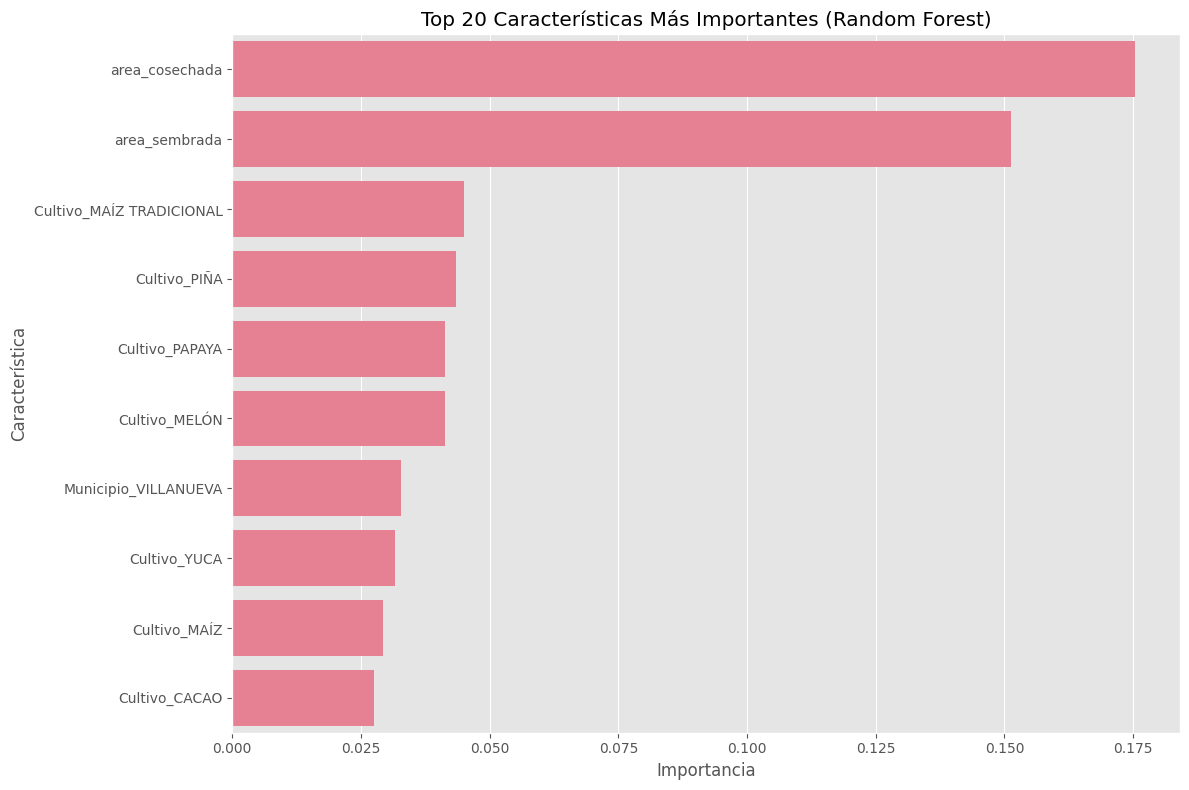

In [70]:
#Importancia de características (Random Forest)
# Obtener nombres de características después del preprocesamiento
preprocessor.fit(X_train)
feature_names = (preprocessor.named_transformers_['cat']
                 .get_feature_names_out(['Municipio', 'Cultivo'])).tolist()
feature_names += ['area_sembrada', 'area_cosechada']

# Obtener importancias de características
importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Crear DataFrame para visualización
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False).head(10)  # Mostrar solo las 10 más importantes

# Visualizar importancias
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Top 20 Características Más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [71]:
# Conversión del objetivo a clasificación binaria
#Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Convertir la variable 'rendimiento' a binaria según el promedio
threshold = data['rendimiento'].mean()
data['alto_rendimiento'] = (data['rendimiento'] >= threshold).astype(int)

# Nuevas variables predictoras (puedes ajustar las columnas)
X = data[['Municipio', 'Cultivo', 'area_sembrada', 'area_cosechada']]
y_class = data['alto_rendimiento']

# Dividir los datos
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Preprocesamiento (mismo pipeline)
preprocessor_class = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Municipio', 'Cultivo'])
    ],
    remainder='passthrough'
)

# Pipeline para Regresión Logística
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor_class),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar el modelo
logreg_pipeline.fit(X_train, y_train_class)

# Predecir
y_pred_class = logreg_pipeline.predict(X_test)

# Evaluar el modelo
print("\nEvaluación de Regresión Logística:")
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))



Evaluación de Regresión Logística:
[[269  37]
 [ 30 180]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       306
           1       0.83      0.86      0.84       210

    accuracy                           0.87       516
   macro avg       0.86      0.87      0.87       516
weighted avg       0.87      0.87      0.87       516



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Escalar los datos numéricos
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear nuevo preprocesador con escalado para variables numéricas
numeric_features = ['area_sembrada', 'area_cosechada']
categorical_features = ['Municipio', 'Cultivo']

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Nuevo pipeline con escalado
logreg_pipeline_scaled = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('classifier', LogisticRegression(max_iter=3000))
])

# Entrenamiento
logreg_pipeline_scaled.fit(X_train, y_train_class)

# Evaluación
y_pred_scaled = logreg_pipeline_scaled.predict(X_test)
print("\nRegresión logística con escalado:")
print(confusion_matrix(y_test_class, y_pred_scaled))
print(classification_report(y_test_class, y_pred_scaled))



Regresión logística con escalado:
[[268  38]
 [ 30 180]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       306
           1       0.83      0.86      0.84       210

    accuracy                           0.87       516
   macro avg       0.86      0.87      0.86       516
weighted avg       0.87      0.87      0.87       516



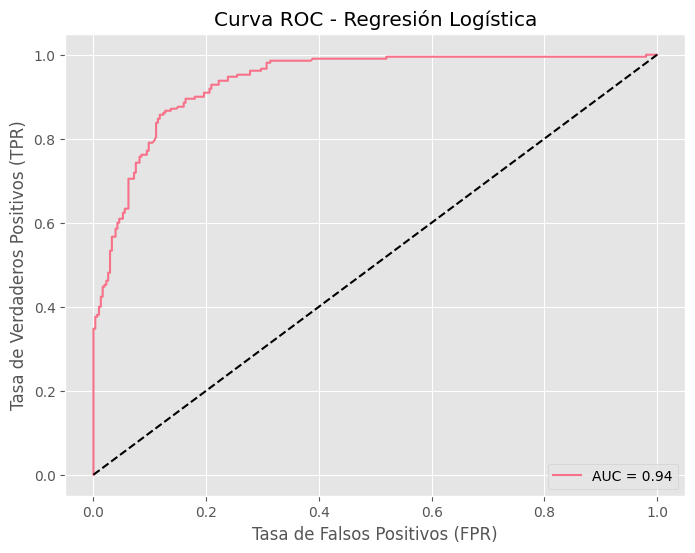

In [73]:
# Curva ROC y AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades de clase positiva (alto rendimiento)
y_proba = logreg_pipeline_scaled.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_class, y_proba)
auc = roc_auc_score(y_test_class, y_proba)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
